In [2]:
from __init__ import * 

/home/pourya/.conda/envs/htv_reg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
grid_points_fine = create_grid_coords(5, 9, 'cpu')
grid_points = create_grid_coords(5, 5, 'cpu')

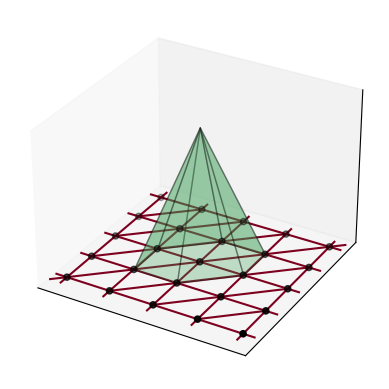

In [4]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(grid_points[:, 0], grid_points[:, 1], zs=0, zdir='z', c='black', marker='o')
ax.set_zlim(0, 1.1)

def f(x, y):
    x = x - 2
    y = y - 2
    return np.maximum(1 + np.minimum(np.minimum(x, y), x*0) - np.maximum(np.maximum(x, y), x*0), x*0)

x = np.linspace(0, 4, 301)
y = np.linspace(0, 4, 301)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax.plot([0, 1], [3, 4], zs=0, c='#7d011f')
ax.plot([0, 2], [2, 4], zs=0, c='#7d011f')
ax.plot([0, 3], [1, 4], zs=0, c='#7d011f')
ax.plot([-0.25, 4.25], [-0.25, 4.25], zs=0, c='#7d011f')
ax.plot([1, 4], [0, 3], zs=0, c='#7d011f')
ax.plot([2, 4], [0, 2], zs=0, c='#7d011f')
ax.plot([3, 4], [0, 1], zs=0, c='#7d011f')

for i in range(5):
    ax.plot([-0.25, 4.25], [i, i], zs=0, c='#7d011f')
    ax.plot([i, i],[-0.25, 4.25], zs=0, c='#7d011f')


ax.set_xlim3d([-0.25, 4.25])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)

fc = '#3ea059'
plt.gca().add_collection3d(Poly3DCollection([list(zip([2, 2, 3], [2, 1, 2], [1, 0, 0]))], alpha=.3, facecolor=fc, edgecolor='k'))
plt.gca().add_collection3d(Poly3DCollection([list(zip([2, 2, 1], [2, 1, 1], [1, 0, 0]))], alpha=.3, facecolor=fc, edgecolor='k'))
plt.gca().add_collection3d(Poly3DCollection([list(zip([2, 1, 1], [2, 2, 1], [1, 0, 0]))], alpha=.3, facecolor=fc, edgecolor='k'))
plt.gca().add_collection3d(Poly3DCollection([list(zip([2, 1, 2], [2, 2, 3], [1, 0, 0]))], alpha=.3, facecolor=fc, edgecolor='k'))
plt.gca().add_collection3d(Poly3DCollection([list(zip([2, 3, 2], [2, 3, 3], [1, 0, 0]))], alpha=.3, facecolor=fc, edgecolor='k'))
plt.gca().add_collection3d(Poly3DCollection([list(zip([2, 3, 3], [2, 3, 2], [1, 0, 0]))], alpha=.3, facecolor=fc, edgecolor='k'))

plt.savefig('Figures/B2.pdf')
plt.show()

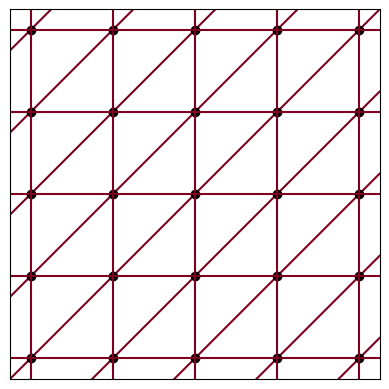

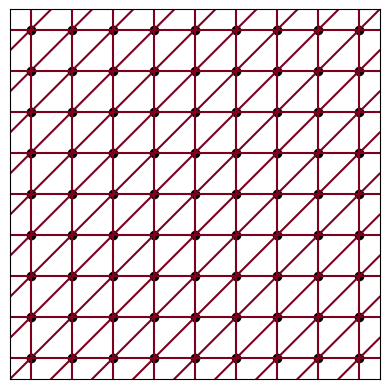

In [5]:
ax = plt.subplot(111)
ax.set_aspect('equal', 'box')
for i in range(5): 
    plt.axvline(x = i, color = '#7d011f')
    plt.axhline(y = i, color = '#7d011f')


for i in range(9):
    plt.axline((i-4, 0), slope=1, color='#7d011f', zorder=0)

plt.scatter(grid_points[:, 0], grid_points[:, 1], color='black', zorder=1)
plt.xlim([-0.25, 4.25])
plt.ylim([-0.25, 4.25])
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('Figures/kuhn-freu.pdf')
plt.show()

ax = plt.subplot(111)
ax.set_aspect('equal', 'box')
for i in range(10): 
    plt.axvline(x = i*0.5, color = '#7d011f')
    plt.axhline(y = i*0.5, color = '#7d011f')


for i in range(17):
    plt.axline((i*0.5-4, 0), slope=1, color='#7d011f')

plt.scatter(grid_points_fine[:, 0], grid_points_fine[:, 1], color='k')
plt.xlim([-0.25, 4.25])
plt.ylim([-0.25, 4.25])
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('Figures/kuhn-freu-fine.pdf')
plt.show()

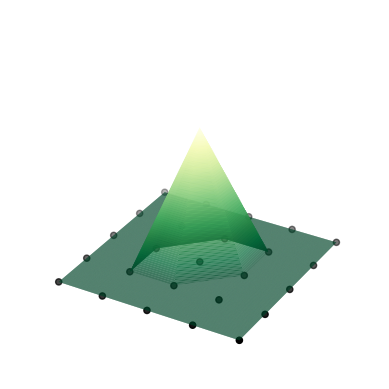

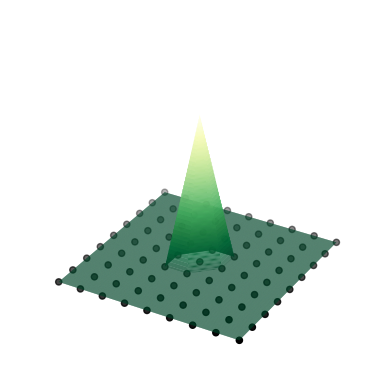

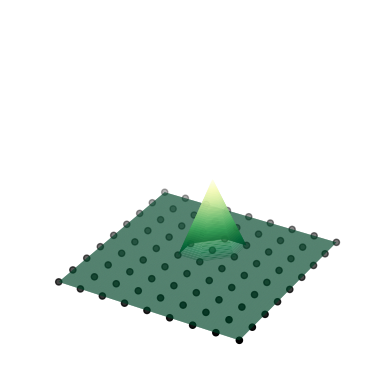

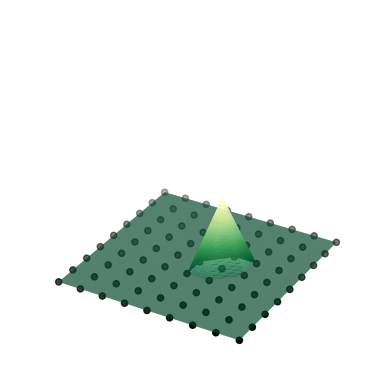

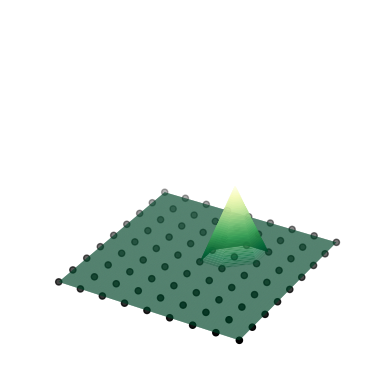

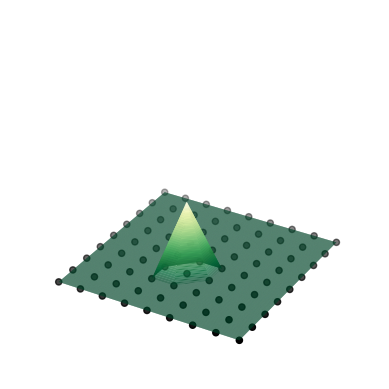

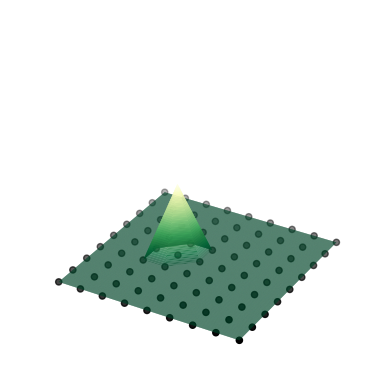

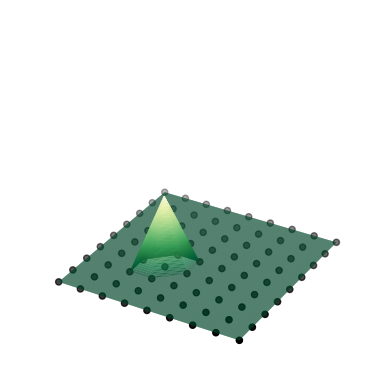

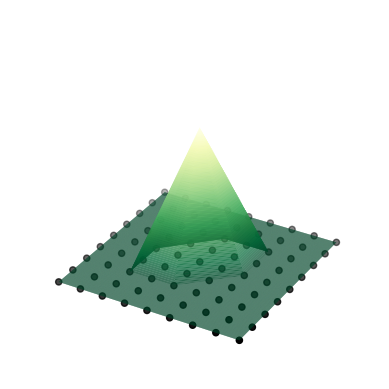

In [6]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(grid_points[:, 0], grid_points[:, 1], zs=0, zdir='z', c='black')

ax.set_zlim(0, 1.1)

def box(x, y): 
    return np.maximum(1 + np.minimum(np.minimum(x, y), x*0) - np.maximum(np.maximum(x, y), x*0), x*0)


x = np.linspace(0, 4, 301)
y = np.linspace(0, 4, 301)

X, Y = np.meshgrid(x, y)
Z = box(X-2, Y-2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='YlGn_r', edgecolor='none')
plt.axis('off')
plt.savefig('Figures/coarse.png')
plt.show()

x = np.linspace(0, 4, 301)
y = np.linspace(0, 4, 301)

X, Y = np.meshgrid(x, y)
f00 = box((X-2)*2, (Y-2)*2)
f01 = box((X-2)*2, (Y-2.5)*2) / 2
f10 = box((X-2.5)*2, (Y-2)*2) / 2
f11 = box((X-2.5)*2, (Y-2.5)*2) / 2
fm01 = box((X-2)*2, (Y-1.5)*2) / 2
fm10 = box((X-1.5)*2, (Y-2)*2) / 2
fm11 = box((X-1.5)*2, (Y-1.5)*2) / 2

fs = [f00, f01, f10, f11, fm01, fm10, fm11]

for i in range(7): 
    ax = plt.subplot(1, 1, 1, projection='3d')
    ax.scatter(grid_points_fine[:, 0], grid_points_fine[:, 1], zs=0, zdir='z', c='black')
    ax.set_zlim(0, 1.01)
    Z = fs[i]
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='YlGn_r', edgecolor='none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    plt.axis('off')
    plt.savefig('Figures/'+str(i)+'.png')
    plt.show()

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(grid_points_fine[:, 0], grid_points_fine[:, 1], zs=0, zdir='z', c='black')
ax.set_zlim(0, 1.1)
Z = f00 + f01 + f10 + f11 + fm01 + fm10 + fm11
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='YlGn_r', edgecolor='none')

plt.axis('off')
plt.savefig('Figures/fine.png')
plt.show()

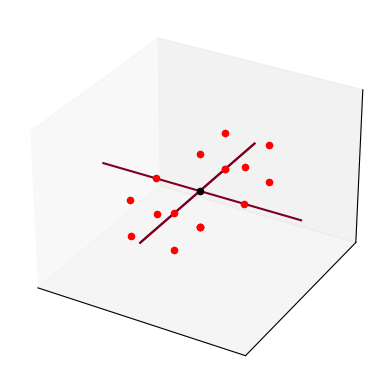

In [7]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(2, 2, 2, zdir='z', c='k', marker='o')
ax.scatter(3, 2, 2, zdir='z', c='r', marker='o')
ax.scatter(2, 3, 2, zdir='z', c='r', marker='o')
ax.scatter(2, 3, 2, zdir='z', c='r', marker='o')
ax.scatter(2, 3, 3, zdir='z', c='r', marker='o')
ax.scatter(3, 3, 2, zdir='z', c='r', marker='o')
ax.scatter(3, 3, 3, zdir='z', c='r', marker='o')
ax.scatter(2, 2, 3, zdir='z', c='r', marker='o')
ax.scatter(3, 2, 3, zdir='z', c='r', marker='o')
ax.scatter(1, 1, 1, zdir='z', c='r', marker='o')
ax.scatter(2, 1, 1, zdir='z', c='r', marker='o')
ax.scatter(1, 1, 2, zdir='z', c='r', marker='o')
ax.scatter(1, 2, 1, zdir='z', c='r', marker='o')
ax.scatter(2, 2, 1, zdir='z', c='r', marker='o')
ax.scatter(2, 2, 1, zdir='z', c='r', marker='o')
ax.scatter(1, 2, 2, zdir='z', c='r', marker='o')
ax.scatter(2, 2, 1, zdir='z', c='r', marker='o')
ax.scatter(2, 1, 2, zdir='z', c='r', marker='o')

ax.set_zlim(0, 4.1)

ax.set_xlim3d([-0.25, 4.25])
ax.set_ylim3d([-0.25, 4.25])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)

ax.plot([-0.25, 4.25], [2, 2], zs=2, c='#7d011f')
ax.plot([2, 2],[-0.25, 4.25], zs=2, c='#7d011f')
ax.plot([2, 2],[-0.25, 4.25], zs=2, c='#7d011f')

plt.savefig('Figures/2dgrid.pdf')
plt.show()

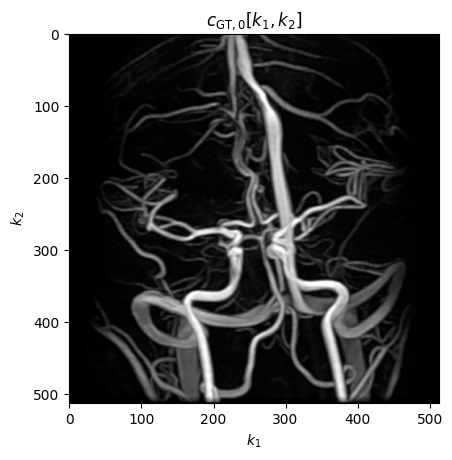

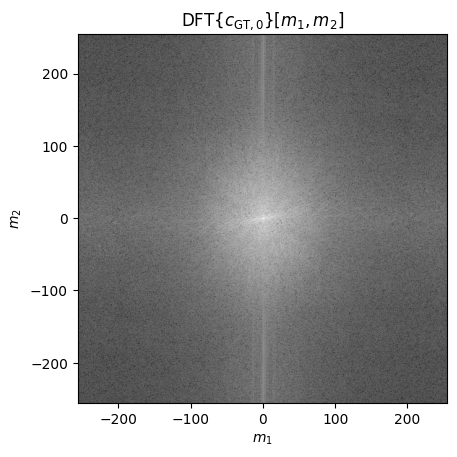

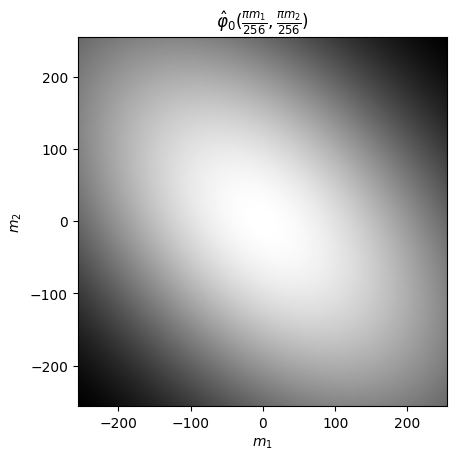

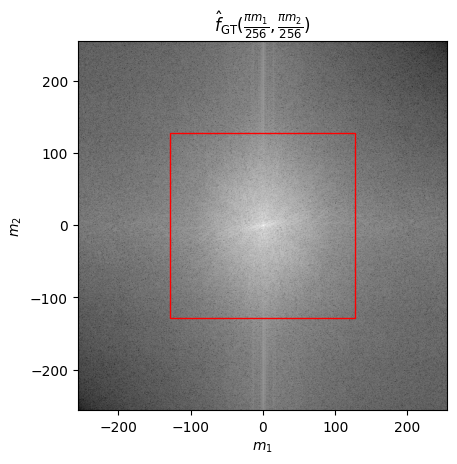

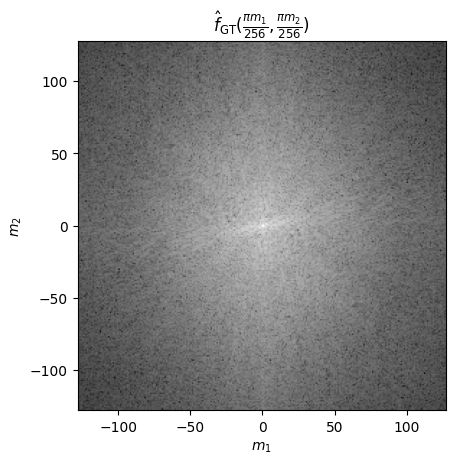

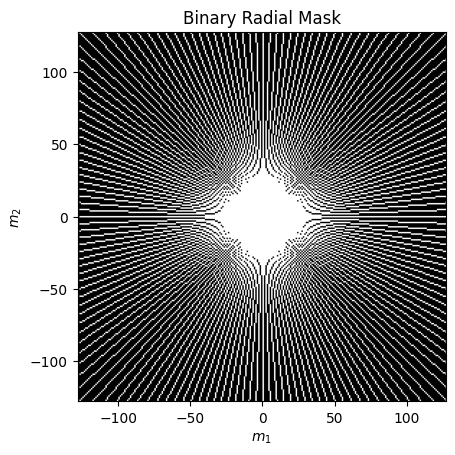

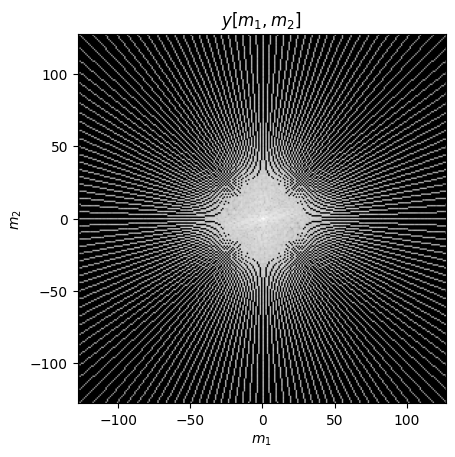

In [8]:
img_full = torch.load('ExpB/saved_results/mrs_full_img.pt')

c_gt = img_full.cpu()
plt.imshow(c_gt[0, 0], cmap='gray')
plt.title('$c_{\mathrm{GT}, 0}[k_1, k_2]$')
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
plt.savefig('ExpB/saved_figs/c_GT.png')
plt.show()

dft_c = torch.fft.fft2(c_gt.double()[:, :, :-1, :-1], norm='ortho')
plt.imshow(torch.log(torch.abs(torch.fft.fftshift(dft_c[0, 0, :, :])) +1e-9).cpu().numpy(), cmap='gray', extent=[-256, 255, -256, 255])
plt.title(r'$\mathrm{DFT}\{c_{\mathrm{GT}, 0}\}[m_1, m_2]$')
plt.xlabel('$m_1$')
plt.ylabel('$m_2$')
plt.savefig('ExpB/saved_figs/dft_c_GT.png')
plt.show()

N = 512
w_1 = - torch.fft.fftfreq(N).repeat(N, 1)
w_2 = torch.fft.fftfreq(N)[:, None].repeat(1, N)
w_sum = w_1 + w_2
box_corr = (torch.sinc(w_1) * torch.sinc(w_2) * torch.sinc(w_sum))[None, None, :, :].double().to('cpu').double()

plt.imshow(torch.fft.fftshift(box_corr[0, 0, :, :]).cpu().numpy(), cmap='gray', extent=[-256, 255, -256, 255])
plt.title(r'$\hat{\varphi}_0 (\frac{\pi m_1}{256}, \frac{\pi m_2}{256})$')
plt.xlabel('$m_1$')
plt.ylabel('$m_2$')
plt.savefig('ExpB/saved_figs/sinc_mask.png')
plt.show()

F_f = dft_c * box_corr
plt.imshow(torch.log(torch.abs(torch.fft.fftshift(F_f[0, 0, :, :])) +1e-9).cpu().numpy(), cmap='gray', extent=[-256, 255, -256, 255])
rect = patches.Rectangle((-128, -128), 256, 256, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.title(r'$\hat{f}_{\mathrm{GT}}(\frac{\pi m_1}{256}, \frac{\pi m_2}{256})$')
plt.xlabel('$m_1$')
plt.ylabel('$m_2$')
plt.savefig('ExpB/saved_figs/F_f.png')
plt.show()

N = 256
h  = 0.5
N_t = N*int(1/h/2)
N_h = int(N//2)
F_f_cropped = torch.fft.ifftshift((torch.fft.fftshift(F_f))[:, :, N_t-N_h:N_t+N_h, N_t-N_h:N_t+N_h] * h)
plt.imshow(torch.log(torch.abs(torch.fft.fftshift(F_f_cropped[0, 0, :, :])) +1e-9).cpu().numpy(), cmap='gray', extent=[-128, 127, -128, 128])
plt.title(r'$\hat{f}_{\mathrm{GT}}(\frac{\pi m_1}{256}, \frac{\pi m_2}{256})$')
plt.xlabel('$m_1$')
plt.ylabel('$m_2$')
plt.savefig('ExpB/saved_figs/F_f_center.png')
plt.show()

mat = scipy.io.loadmat('ExpB/masks/radial_mask.mat')
mask = torch.from_numpy(mat['mask']).double().to('cpu').view([1, 1, 256, 256]) 

plt.imshow(torch.fft.fftshift(mask[0, 0]), cmap='gray', extent=[-128, 127, -128, 128])
plt.title(r'Binary Radial Mask')
plt.xlabel('$m_1$')
plt.ylabel('$m_2$')
plt.savefig('ExpB/saved_figs/radial_mask.png')
plt.show()

y = F_f_cropped * mask

plt.imshow(torch.log(torch.abs(torch.fft.fftshift(y[0, 0, :, :])) +1e-9).cpu().numpy(), cmap='gray', extent=[-128, 127, -128, 128])
plt.title(r'$y[m_1, m_2]$')
plt.xlabel('$m_1$')
plt.ylabel('$m_2$')
plt.savefig('ExpB/saved_figs/y.png')
plt.show()